In [2]:
import rasterio

# Replace with your HGT file path
hgt_file = "data/N00W079.hgt"

with rasterio.open(hgt_file) as dataset:
    elevation = dataset.read(1)  # Read the first band (elevation data)
    print(elevation)

[[  35   40   53 ... 2149 2201 2170]
 [  36   22   34 ... 2216 2248 2216]
 [  46   34   46 ... 2269 2292 2254]
 ...
 [ 760  768  773 ... 4648 4699 4743]
 [ 767  771  774 ... 4606 4676 4710]
 [ 775  778  784 ... 4589 4654 4687]]


In [3]:
elevation.shape

(1201, 1201)

In [4]:
import numpy as np

# Get the affine transform from the dataset
with rasterio.open(hgt_file) as ds:
    transform = ds.transform

height, width = elevation.shape

# Create meshgrid of pixel coordinates
cols, rows = np.meshgrid(np.arange(width), np.arange(height))

# Convert pixel coordinates to geographic coordinates
lon, lat = rasterio.transform.xy(transform, rows, cols, offset="center")
lon = np.array(lon)
lat = np.array(lat)

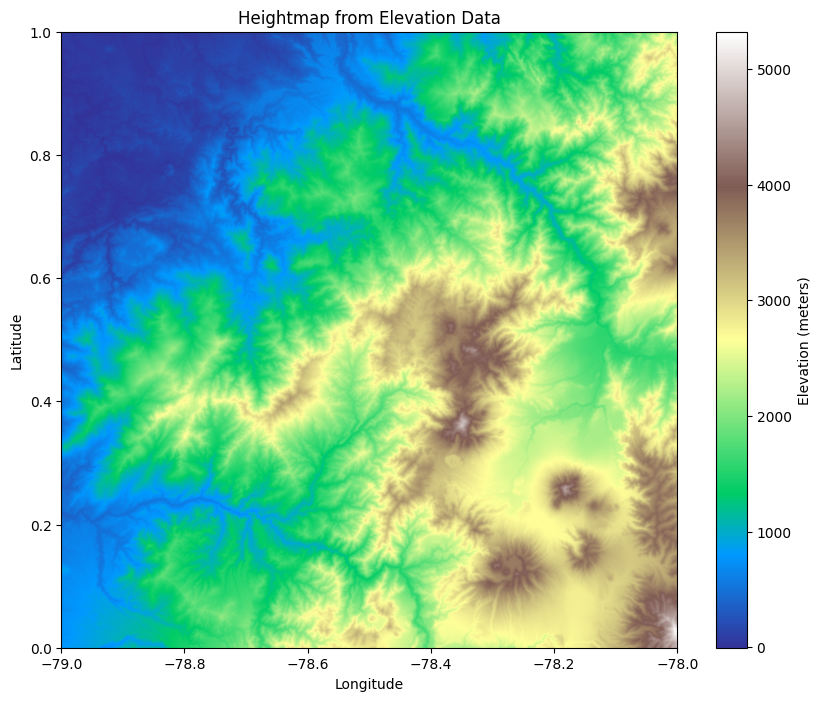

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(
    elevation,
    cmap="terrain",
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    origin="upper",
)
plt.colorbar(label="Elevation (meters)")
plt.title("Heightmap from Elevation Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()